# Creation of MAD-X Input tables for CERN Proton Synchrotron injection bump

## BSW Tables defining dipolar component - Eddy currents cause sextupolar component that defines a tune swing

In [1]:
import os
import numpy as np
from math import log10, floor

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

In [2]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
def seq_start_to_end(n_vals, start, stop):
    n_mp = n_vals
    interval = (stop-start)/(n_mp-1) 

    print('seq_start_to_end::interval = ', interval)

    positions = np.arange(start, stop+interval, interval)
    
    return positions

In [4]:
# golden values for the bump - from Eugenio Senes CERN BE-BI

# Values are for 2 * 10 cm HKICKERs per section (8 total)
# ~ bsw40              =    0.003498034648/2
# ~ bsw42              =    -0.01422287844/2
# ~ bsw43              =    0.01290524313/2
# ~ bsw44              =    -0.006001526439/2
# ~ BSS_max = 2*1.11828e-01 #from twiss

In [5]:
# Values are for 1 * 20 cm SBEND/QUAD per section (4 total) with dipole and
# sextupole component added as an error
bsw40 = -1*0.003498034648
bsw42 = -1*-0.01422287844
bsw43 = -1*0.01290524313
bsw44 = -1*-0.006001526439
BSS_max = 2*1.11828e-01/5 #from twiss 

In [6]:
# build the parameter sweep lists
# Split 0 -> pi into nsteps
nstep = 100.

steps = seq_start_to_end(nstep, 0., (np.pi))


#steps = np.arange(0,nstep+1,1)/nstep * np.pi/2
#steps = np.append(steps, steps+np.pi/2)

# Half the values for only bump closure
len_step = len(steps)
print len_step

('seq_start_to_end::interval = ', 0.03173325912716963)
100


In [7]:
print steps

[0.         0.03173326 0.06346652 0.09519978 0.12693304 0.1586663
 0.19039955 0.22213281 0.25386607 0.28559933 0.31733259 0.34906585
 0.38079911 0.41253237 0.44426563 0.47599889 0.50773215 0.53946541
 0.57119866 0.60293192 0.63466518 0.66639844 0.6981317  0.72986496
 0.76159822 0.79333148 0.82506474 0.856798   0.88853126 0.92026451
 0.95199777 0.98373103 1.01546429 1.04719755 1.07893081 1.11066407
 1.14239733 1.17413059 1.20586385 1.23759711 1.26933037 1.30106362
 1.33279688 1.36453014 1.3962634  1.42799666 1.45972992 1.49146318
 1.52319644 1.5549297  1.58666296 1.61839622 1.65012947 1.68186273
 1.71359599 1.74532925 1.77706251 1.80879577 1.84052903 1.87226229
 1.90399555 1.93572881 1.96746207 1.99919533 2.03092858 2.06266184
 2.0943951  2.12612836 2.15786162 2.18959488 2.22132814 2.2530614
 2.28479466 2.31652792 2.34826118 2.37999443 2.41172769 2.44346095
 2.47519421 2.50692747 2.53866073 2.57039399 2.60212725 2.63386051
 2.66559377 2.69732703 2.72906028 2.76079354 2.7925268  2.824260

In [8]:
def half_list(a_list):
	half = len(a_list)//2
	return a_list[:half], a_list[half:]

def half_list_plus_one(a_list):
	half = len(a_list)//2 - 1
	return a_list[:half], a_list[half:]

#last_half_steps = half_list_plus_one(steps)[1]
last_half_steps = seq_start_to_end(101, (np.pi/2), (np.pi))
first_half_steps = half_list(steps)[0]
#print s
print first_half_steps
print len(first_half_steps)

('seq_start_to_end::interval = ', 0.015707963267948967)
[0.         0.03173326 0.06346652 0.09519978 0.12693304 0.1586663
 0.19039955 0.22213281 0.25386607 0.28559933 0.31733259 0.34906585
 0.38079911 0.41253237 0.44426563 0.47599889 0.50773215 0.53946541
 0.57119866 0.60293192 0.63466518 0.66639844 0.6981317  0.72986496
 0.76159822 0.79333148 0.82506474 0.856798   0.88853126 0.92026451
 0.95199777 0.98373103 1.01546429 1.04719755 1.07893081 1.11066407
 1.14239733 1.17413059 1.20586385 1.23759711 1.26933037 1.30106362
 1.33279688 1.36453014 1.3962634  1.42799666 1.45972992 1.49146318
 1.52319644 1.5549297 ]
50


In [9]:

print last_half_steps
print len(last_half_steps)

[1.57079633 1.58650429 1.60221225 1.61792022 1.63362818 1.64933614
 1.66504411 1.68075207 1.69646003 1.712168   1.72787596 1.74358392
 1.75929189 1.77499985 1.79070781 1.80641578 1.82212374 1.8378317
 1.85353967 1.86924763 1.88495559 1.90066356 1.91637152 1.93207948
 1.94778745 1.96349541 1.97920337 1.99491134 2.0106193  2.02632726
 2.04203522 2.05774319 2.07345115 2.08915911 2.10486708 2.12057504
 2.136283   2.15199097 2.16769893 2.18340689 2.19911486 2.21482282
 2.23053078 2.24623875 2.26194671 2.27765467 2.29336264 2.3090706
 2.32477856 2.34048653 2.35619449 2.37190245 2.38761042 2.40331838
 2.41902634 2.43473431 2.45044227 2.46615023 2.4818582  2.49756616
 2.51327412 2.52898209 2.54469005 2.56039801 2.57610598 2.59181394
 2.6075219  2.62322987 2.63893783 2.65464579 2.67035376 2.68606172
 2.70176968 2.71747765 2.73318561 2.74889357 2.76460154 2.7803095
 2.79601746 2.81172542 2.82743339 2.84314135 2.85884931 2.87455728
 2.89026524 2.9059732  2.92168117 2.93738913 2.95309709 2.9688050

In [10]:
# strengths for the simulation

# sextupole strength
BSS_val = BSS_max*np.cos(steps)

# dipole (kicker) strength
bsw40_val = bsw40*np.sin(steps)
bsw42_val = bsw42*np.sin(steps)
bsw43_val = bsw43*np.sin(steps)
bsw44_val = bsw44*np.sin(steps)

# sexupole strengths
bsw40_sxt = BSS_max*np.cos(steps)*(bsw40/bsw42)*np.sin(steps)
bsw42_sxt = BSS_max*np.cos(steps)*(bsw42/bsw42)*np.sin(steps)
bsw43_sxt = BSS_max*np.cos(steps)*(bsw43/bsw42)*np.sin(steps)
bsw44_sxt = BSS_max*np.cos(steps)*(bsw44/bsw42)*np.sin(steps)

## Plot 

In [11]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

save_folder = 'Plots/'

('seq_start_to_end::interval = ', 10.1010101010101)


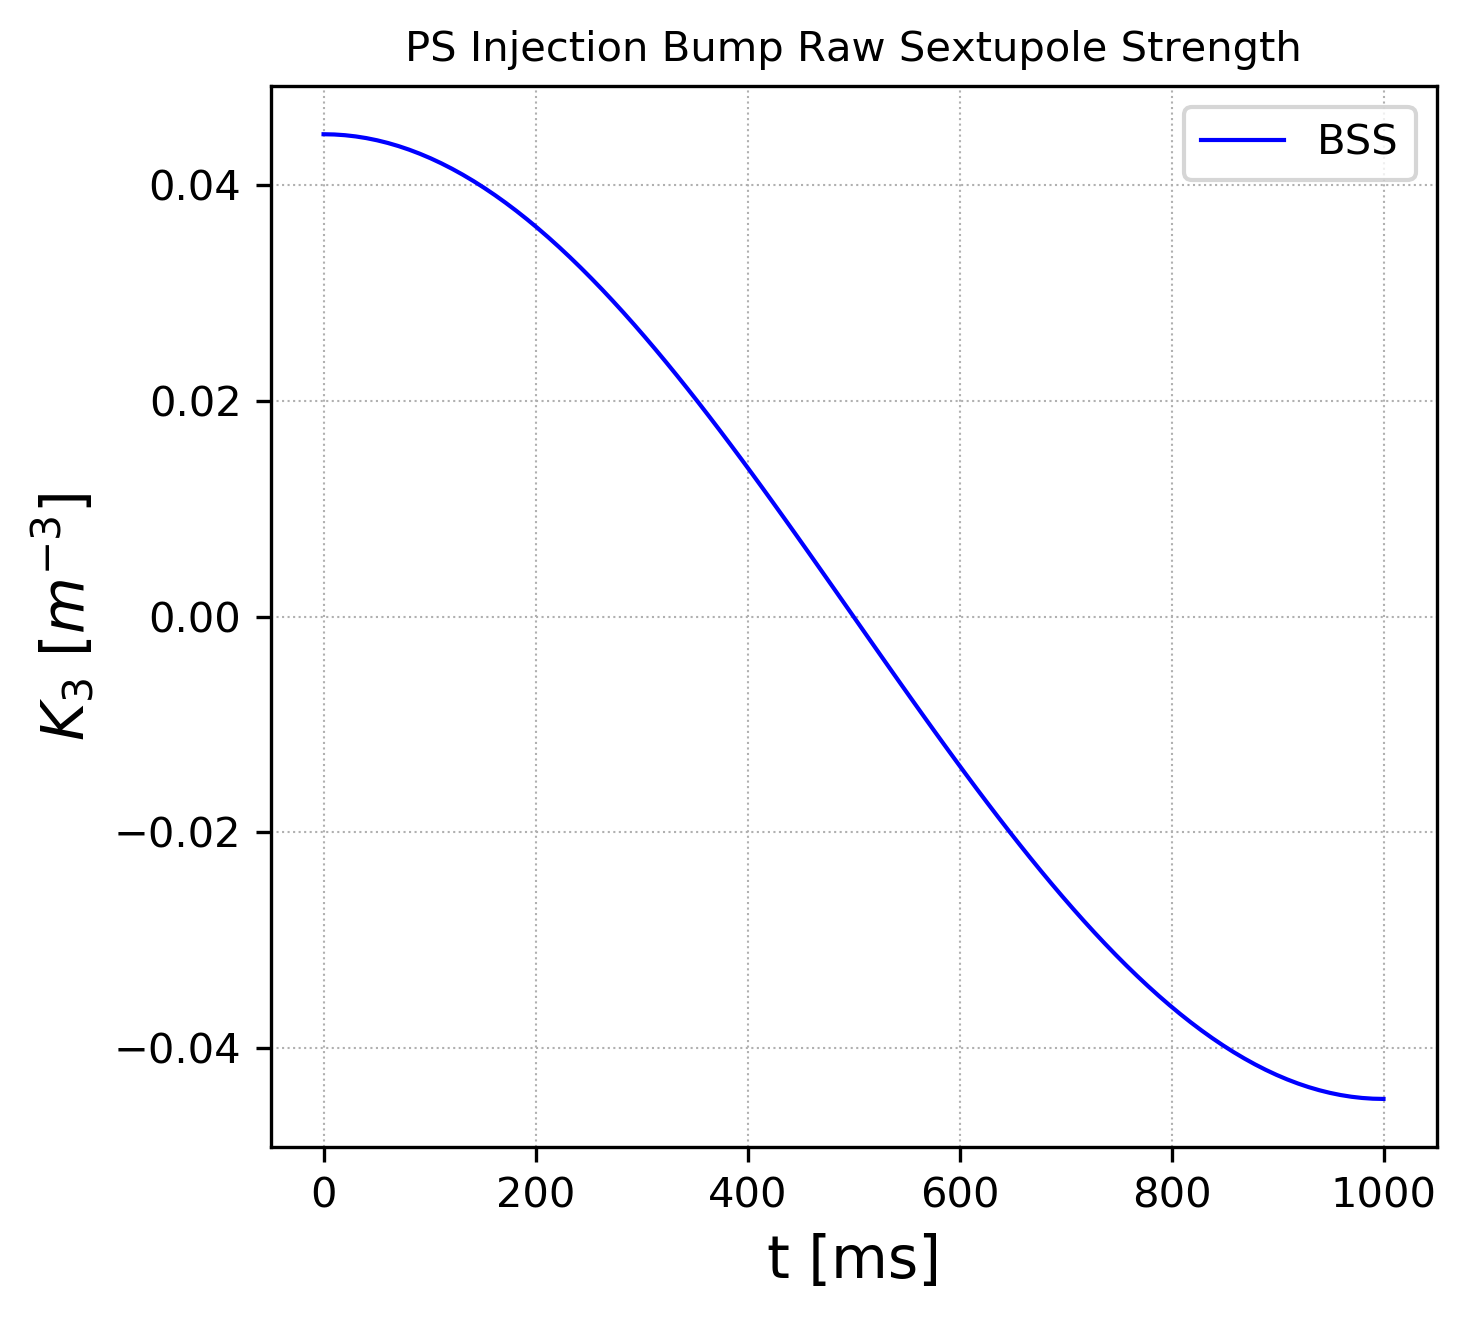

In [12]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump Raw Sextupole Strength')
savename = save_folder + 'Sext_Raw_Full.png'

x = seq_start_to_end(len(BSS_val), 0., 1000.)
ax1.plot(x, BSS_val, label='BSS', color='b');

ax1.set_xlabel('t [ms]')
ax1.set_ylabel('$K_3$ [$m^{-3}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 10.1010101010101)


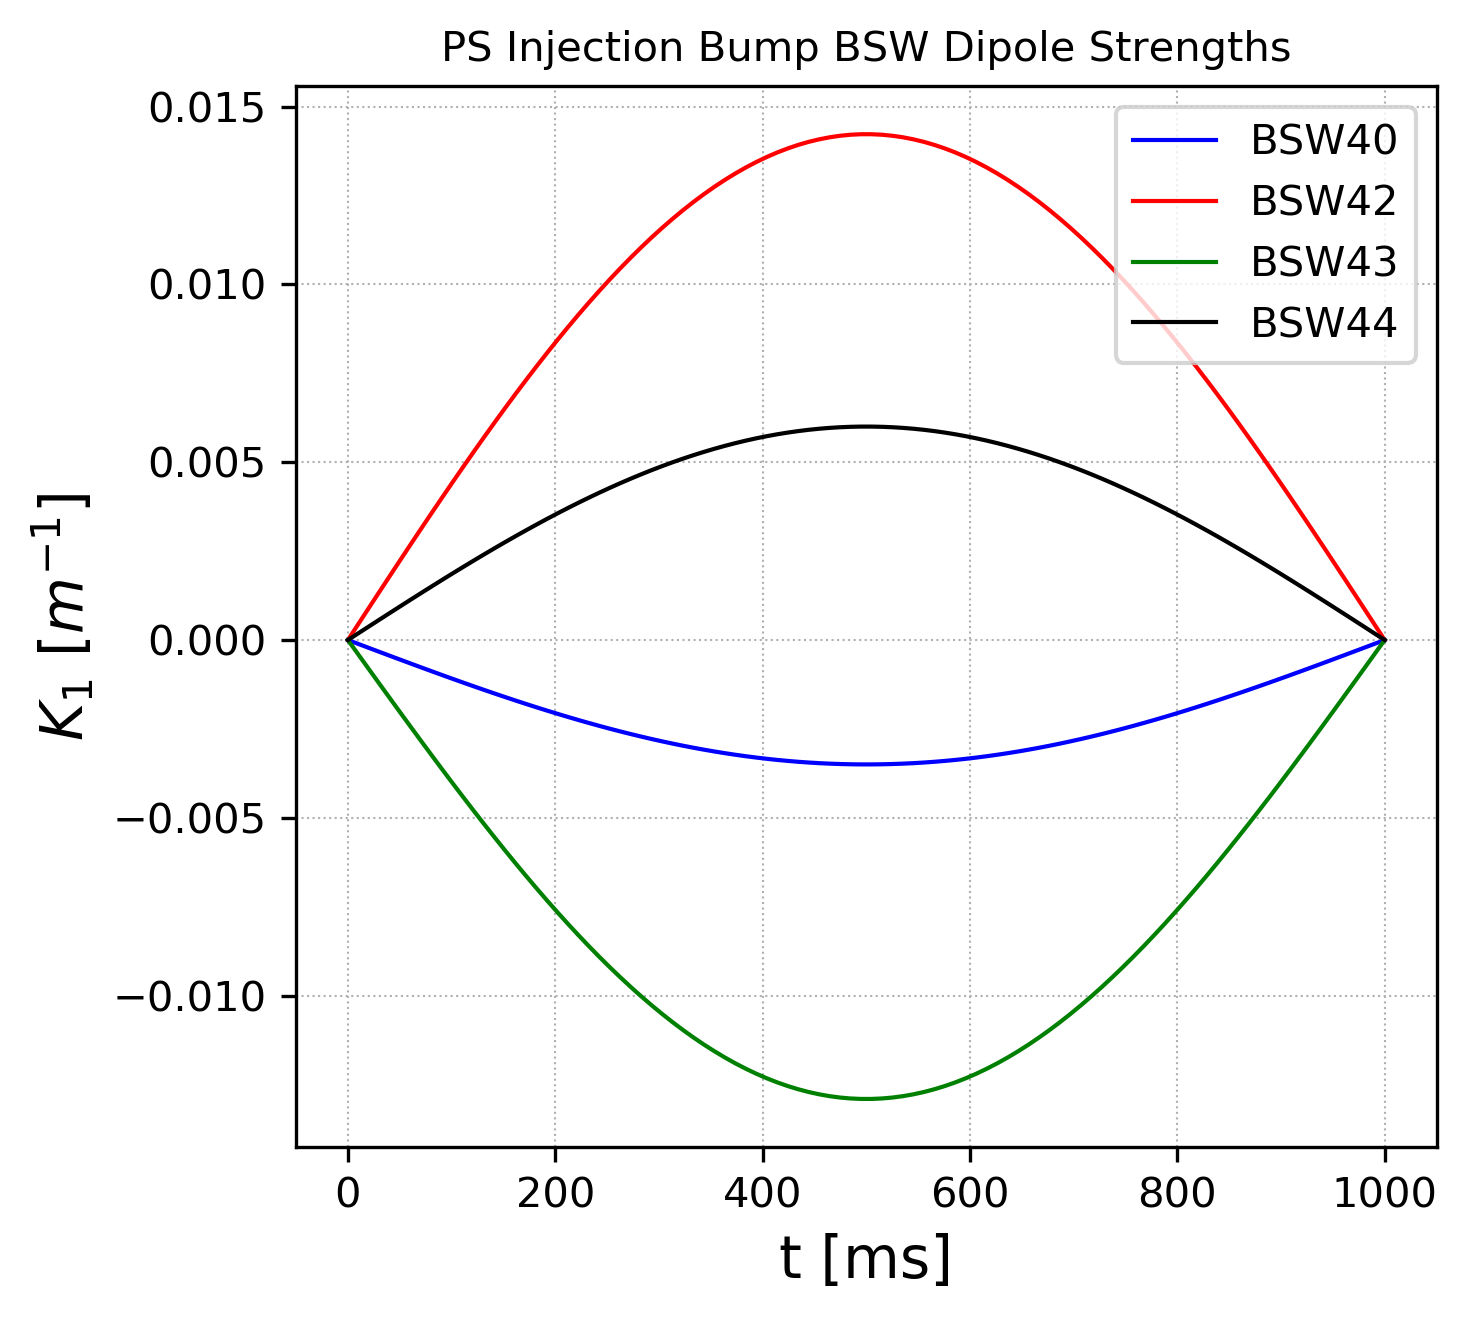

In [13]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Dipole Strengths')
savename = save_folder + 'Dipole_Full.png'

x = seq_start_to_end(len(bsw40_val), 0., 1000.)
ax1.plot(x, bsw40_val, label='BSW40', color='b');
ax1.plot(x, bsw42_val, label='BSW42', color='r');
ax1.plot(x, bsw43_val, label='BSW43', color='g');
ax1.plot(x, bsw44_val, label='BSW44', color='k');

ax1.set_xlabel('t [ms]')
ax1.set_ylabel('$K_1$ [$m^{-1}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 10.1010101010101)


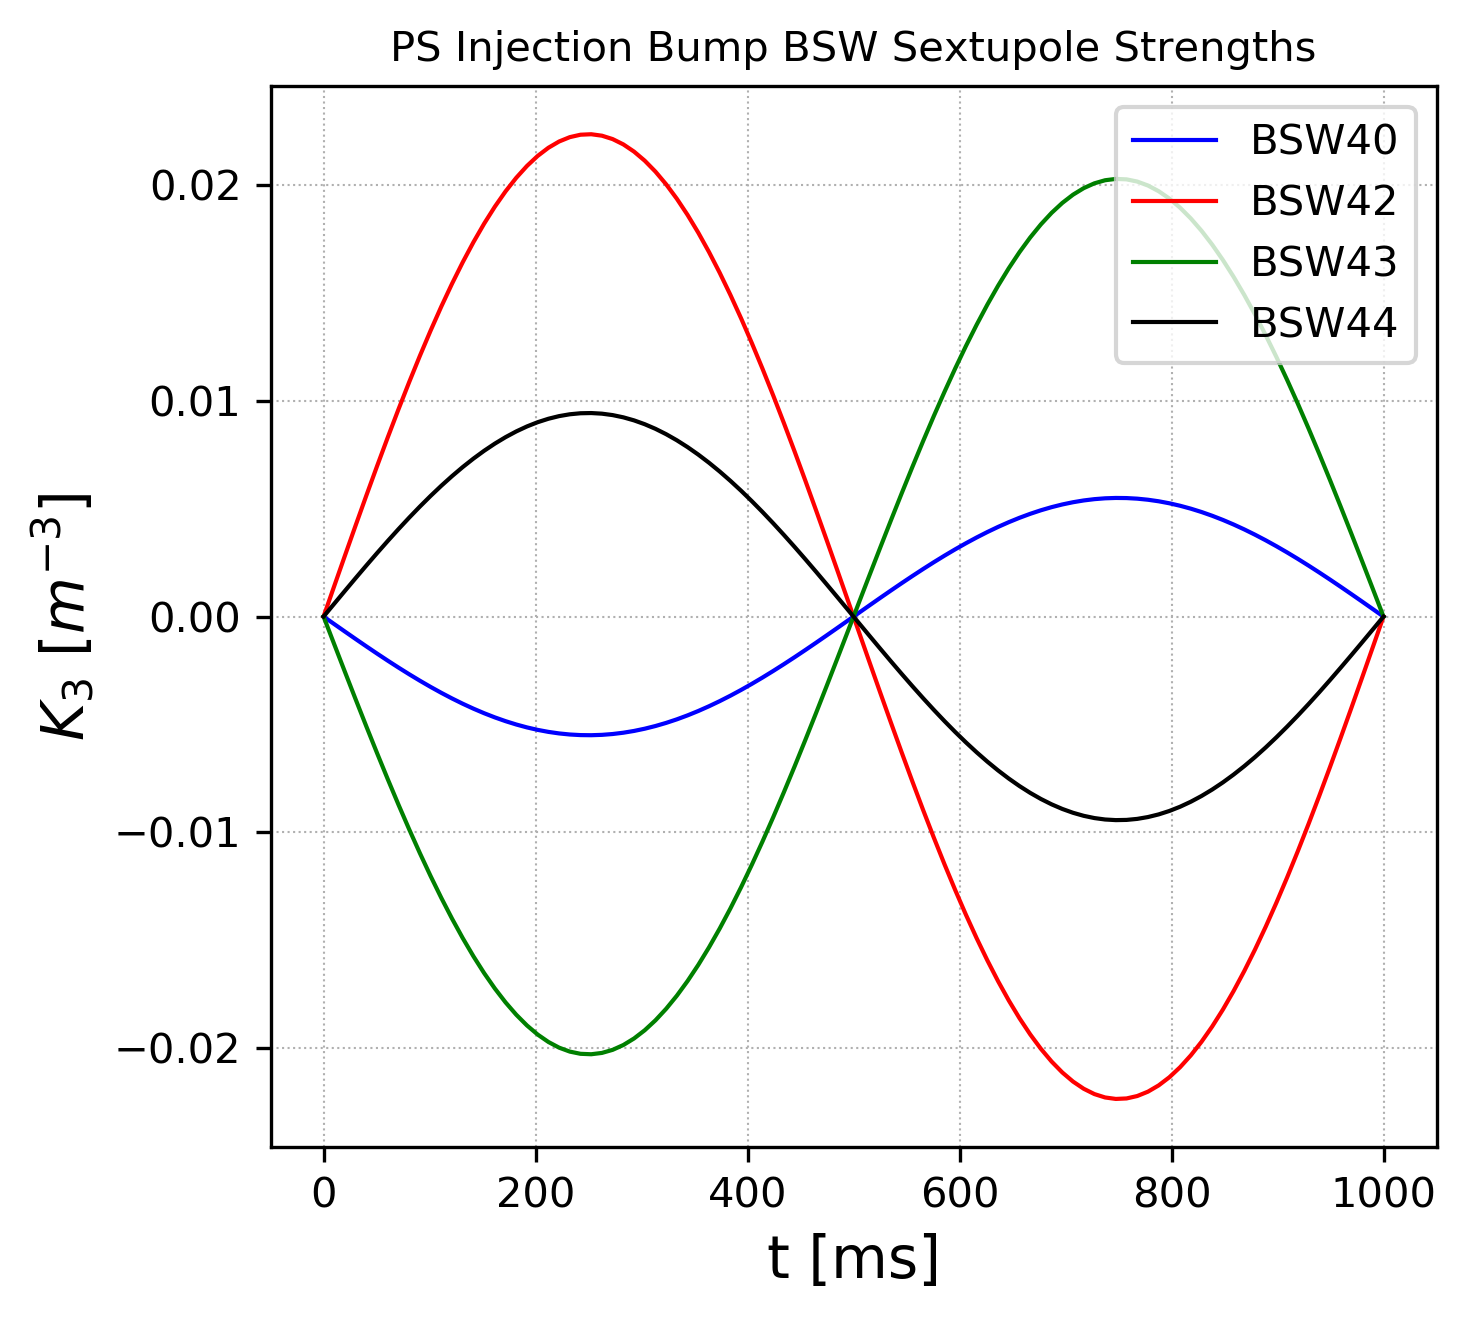

In [14]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Sextupole Strengths')
savename = save_folder + 'Sextupole_Full.png'

x = seq_start_to_end(len(bsw40_val), 0., 1000.)
ax1.plot(x, bsw40_sxt, label='BSW40', color='b');
ax1.plot(x, bsw42_sxt, label='BSW42', color='r');
ax1.plot(x, bsw43_sxt, label='BSW43', color='g');
ax1.plot(x, bsw44_sxt, label='BSW44', color='k');

ax1.set_xlabel('t [ms]')
ax1.set_ylabel('$K_3$ [$m^{-3}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

## Injection is at 500 ms - for PyORBIT sims we only want the bump closure

In [15]:
# strengths for the simulation - bump closre

# sextupole strength
BSS_val = BSS_max*np.cos(last_half_steps)

# dipole (kicker) strength
bsw40_val_closure = bsw40*np.sin(last_half_steps)
bsw42_val_closure = bsw42*np.sin(last_half_steps)
bsw43_val_closure = bsw43*np.sin(last_half_steps)
bsw44_val_closure = bsw44*np.sin(last_half_steps)

# sexupole strengths
bsw40_sxt_closure = BSS_max*np.cos(last_half_steps)*(bsw40/bsw42)*np.sin(last_half_steps)
bsw42_sxt_closure = BSS_max*np.cos(last_half_steps)*(bsw42/bsw42)*np.sin(last_half_steps)
bsw43_sxt_closure = BSS_max*np.cos(last_half_steps)*(bsw43/bsw42)*np.sin(last_half_steps)
bsw44_sxt_closure = BSS_max*np.cos(last_half_steps)*(bsw44/bsw42)*np.sin(last_half_steps)

In [16]:
len(bsw40_val_closure)

101

In [17]:

x = seq_start_to_end(90, 500, 1000)
len(x)

('seq_start_to_end::interval = ', 5)


101

('seq_start_to_end::interval = ', 5.0)


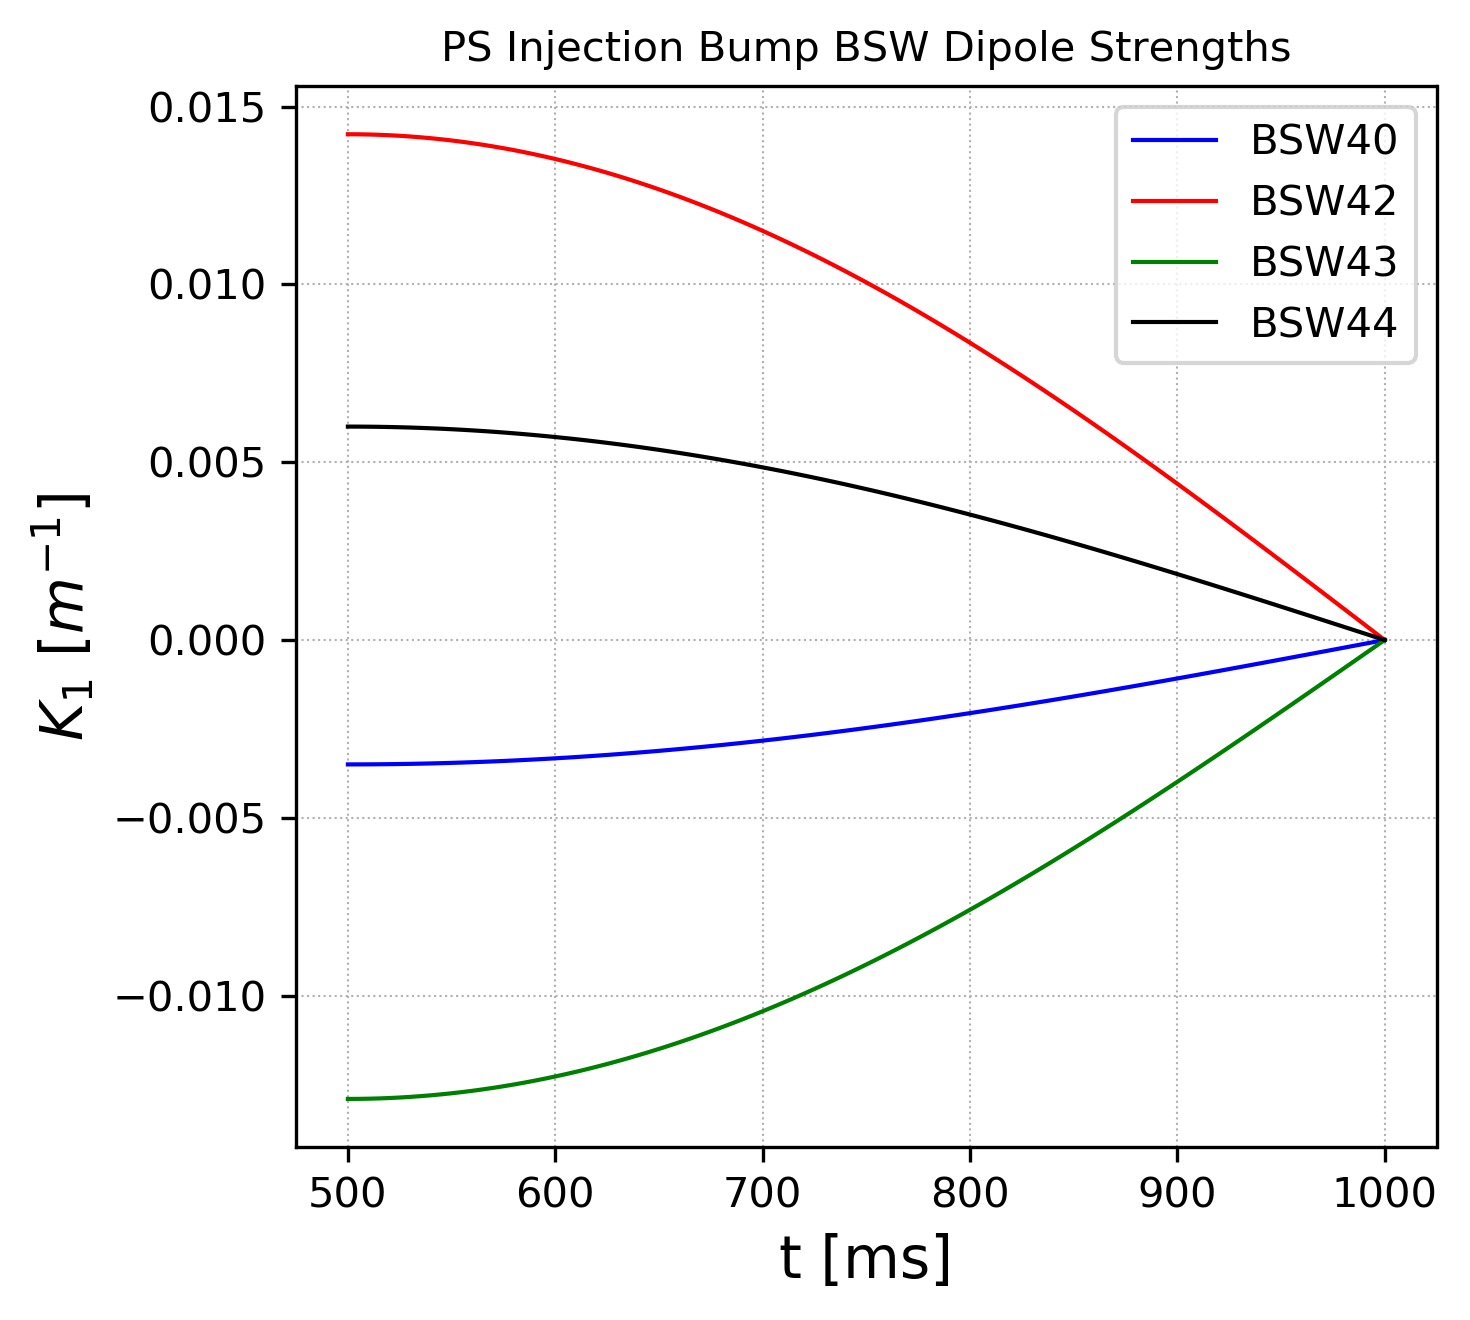

In [18]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Dipole Strengths')
savename = save_folder + 'Dipole_Half.png'

x = seq_start_to_end(len(bsw40_val_closure), 500., 1000.)
ax1.plot(x, bsw40_val_closure, label='BSW40', color='b');
ax1.plot(x, bsw42_val_closure, label='BSW42', color='r');
ax1.plot(x, bsw43_val_closure, label='BSW43', color='g');
ax1.plot(x, bsw44_val_closure, label='BSW44', color='k');

ax1.set_xlabel('t [ms]')
ax1.set_ylabel('$K_1$ [$m^{-1}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 5.0)


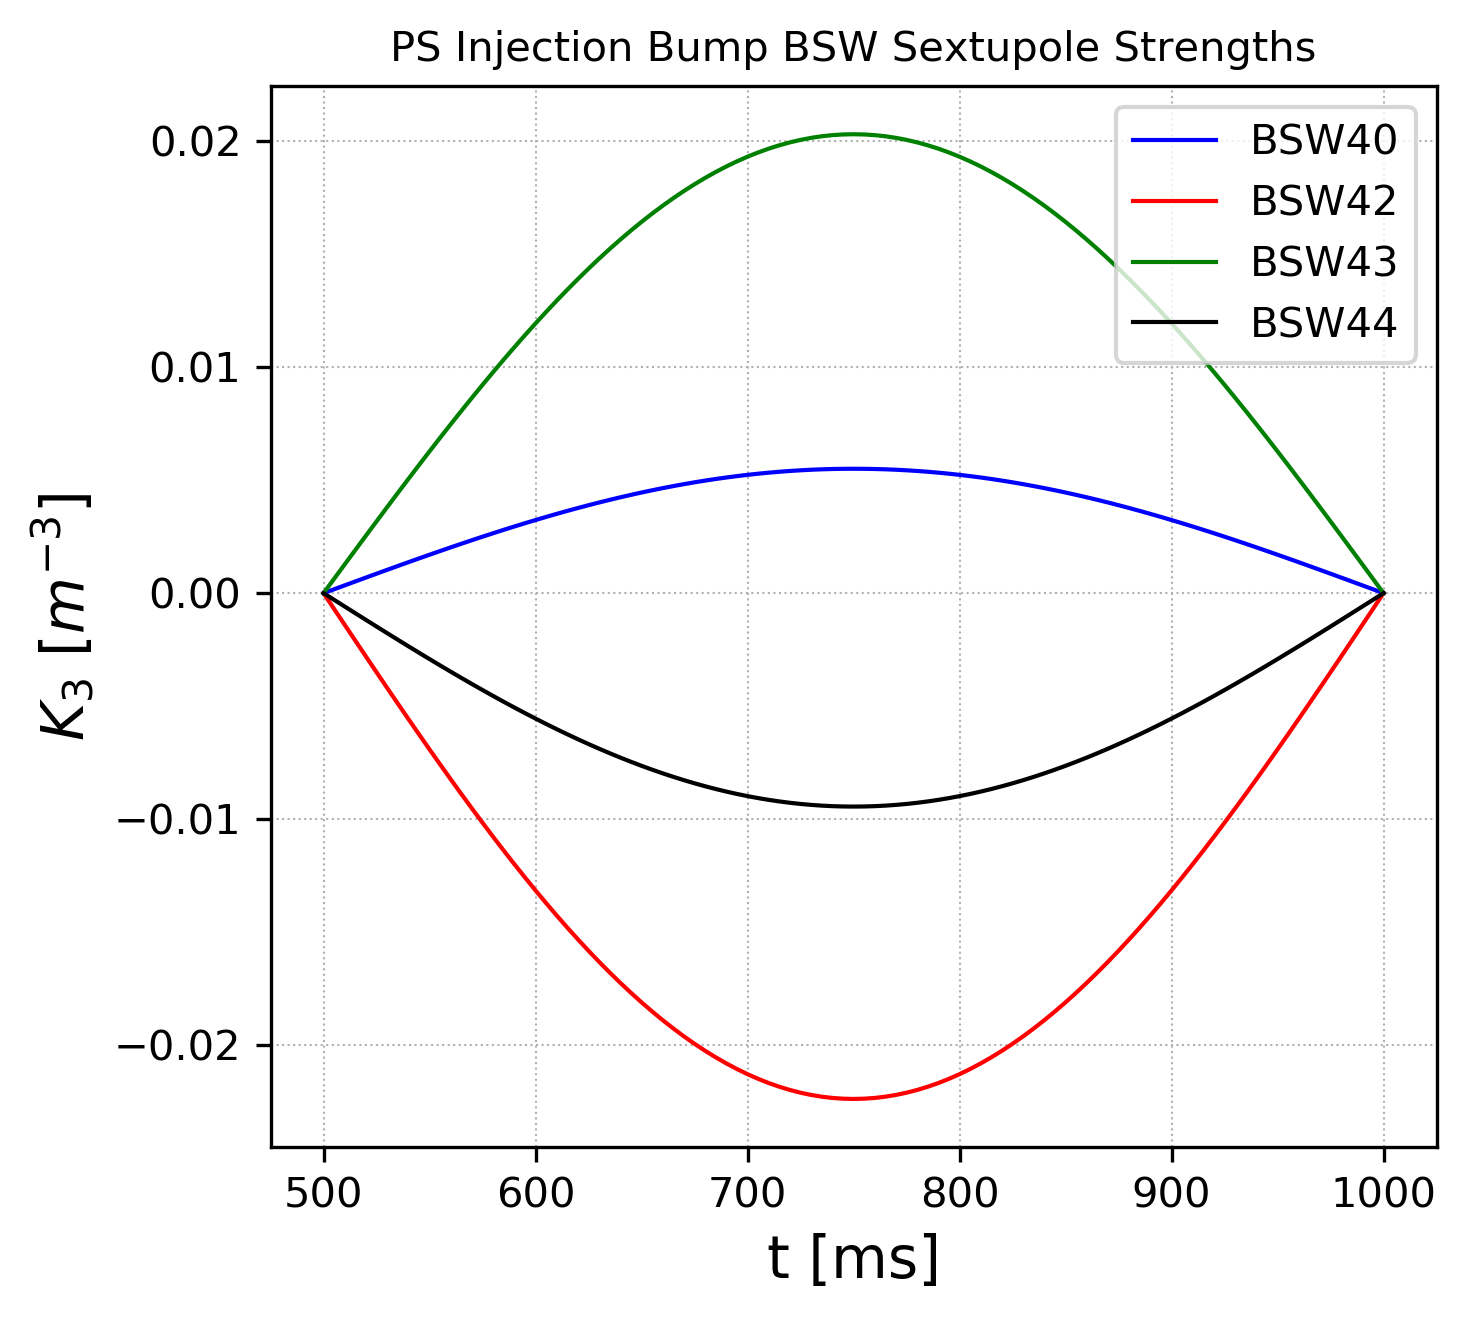

In [19]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Sextupole Strengths')
savename = save_folder + 'Sextupole_Half.png'

x = seq_start_to_end(len(bsw40_val_closure), 500., 1000.)
ax1.plot(x, bsw40_sxt_closure, label='BSW40', color='b');
ax1.plot(x, bsw42_sxt_closure, label='BSW42', color='r');
ax1.plot(x, bsw43_sxt_closure, label='BSW43', color='g');
ax1.plot(x, bsw44_sxt_closure, label='BSW44', color='k');

ax1.set_xlabel('t [ms]')
ax1.set_ylabel('$K_3$ [$m^{-3}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

##  Write to file

In [20]:
write_file = True
half_bump = True
if write_file:
    f = open("BSEXT_Bump_SBEND.tfs","w")

    # MADX
    #-BSStren*(BSW40/BSW42)
    # Equivalent
    #-BSS_val[t]*(bsw40*np.sin(t) / bsw42*np.sin(t))

    # We want a table, with K2 columns, one for each sextupole (4)
    # 9 spaces before and between each column
    # with header something like:
    header = "@ NAME             %08s \"BSWTABLE\"\n@ TYPE             %04s \"USER\"\n@ TITLE            %03s \"BSW\"\n@ ORIGIN           %16s \"5.04.02 Linux 64\"\n@ DATE             %08s \"11/04/20\"\n@ TIME             %08s \"12.00.00\"\n"

    f.write(header)
    f.write('*'+' '.join(map(lambda i: i.rjust(18), ['BSEXT_T', 'BSS', 'BSW40_K0', 'BSW42_K0', 'BSW43_K0', 'BSW44_K0'])) + '\n')
    f.write('$'+' '.join(map(lambda i: i.rjust(18), ['%le', '%le', '%le', '%le','%le', '%le'])) + '\n')

    if half_bump:         
        x = seq_start_to_end(len(last_half_steps), 0., 500.)
        for i in xrange(0,len(last_half_steps)):
            f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], BSS_max*np.cos(last_half_steps[i]), bsw40*np.sin(last_half_steps[i]), bsw42*np.sin(last_half_steps[i]), bsw43*np.sin(last_half_steps[i]), bsw44*np.sin(last_half_steps[i])])) + '\n')

    else:
        for i in xrange(0,len(steps)):
            f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [steps[i], BSS_max*np.cos(steps[i]), bsw40*np.sin(t[i]), bsw42*np.sin(steps[i]), bsw43*np.sin(steps[i]), bsw44*np.sin(steps[i])])) + '\n')




('seq_start_to_end::interval = ', 5.0)
